# Visualizing Non-linear SVM

In [1]:
# import libraries
import pandas as pd
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

# set options for rendering plots
%matplotlib inline

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

## make_moons

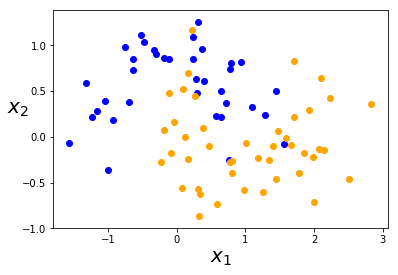

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise = 0.3, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

plt.scatter(X_train[(y_train==0),0],X_train[(y_train==0),1], c = 'blue')
plt.scatter(X_train[(y_train==1),0],X_train[(y_train==1),1], c = 'orange')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show();

## linearSVC

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

poly_clf = polynomial_svm_clf.fit(X_train, y_train)
y_pred = polynomial_svm_clf.predict(X_test)

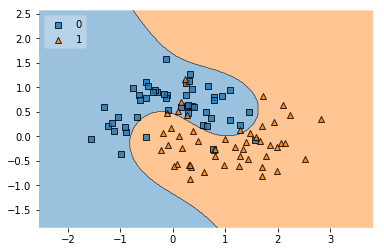

In [4]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=poly_clf, legend=2);

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

# SVC with poly kernel

In [6]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf = poly_kernel_svm_clf.fit(X_train, y_train)
y_pred = poly_kernel_svm_clf.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.9

## plot classifier grid

In [8]:
import matplotlib.gridspec as gridspec
import itertools

linear_clf1 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=0.01, loss="hinge"))
))

linear_clf2 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=0.1, loss="hinge"))
))

linear_clf3 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1, loss="hinge"))
))

linear_clf4 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

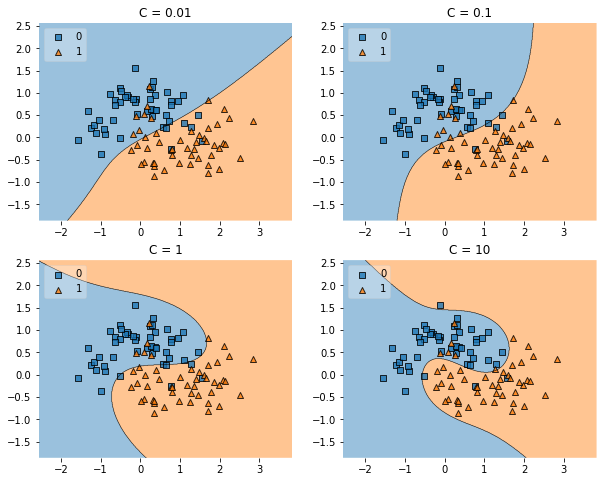

In [9]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['C = 0.01', 'C = 0.1', 'C = 1', 'C = 10']
for clf, lab, grd in zip([linear_clf1, linear_clf2, linear_clf3, linear_clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show();

In [10]:
linear_clf1 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

linear_clf2 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

linear_clf3 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=6)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

linear_clf4 = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

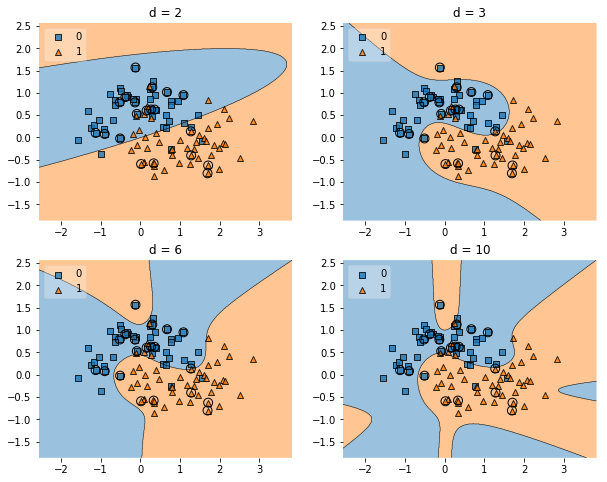

In [11]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['d = 2', 'd = 3', 'd = 6', 'd = 10']
for clf, lab, grd in zip([linear_clf1, linear_clf2, linear_clf3, linear_clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, X_highlight=X_test, legend=2)
    plt.title(lab)

plt.show();

In [12]:
accuracy_score(linear_clf1.predict(X_test), y_test)
accuracy_score(linear_clf2.predict(X_test), y_test)
accuracy_score(linear_clf3.predict(X_test), y_test)
accuracy_score(linear_clf4.predict(X_test), y_test)

1.0

0.85

0.85

0.9

## make_circles data

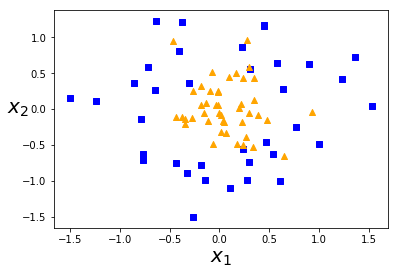

In [13]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=100, noise = 0.3, factor = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

plt.scatter(X_train[(y_train==0),0],X_train[(y_train==0),1], c = 'blue', marker = 's')
plt.scatter(X_train[(y_train==1),0],X_train[(y_train==1),1], c = 'orange', marker = '^')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show();

## Gaussian kernel SVC

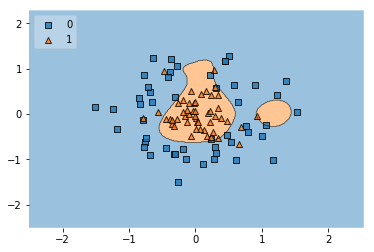

In [14]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=100))
))
rbf_clf = rbf_kernel_svm_clf.fit(X_train, y_train)
y_pred = rbf_kernel_svm_clf.predict(X_test)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=rbf_clf, legend=2);

# plot grid

In [15]:
import matplotlib.gridspec as gridspec
import itertools

rbf_clf1 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=1))
))

rbf_clf2 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=10))
))

rbf_clf3 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=100))
))

rbf_clf4 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", C=1000))
))

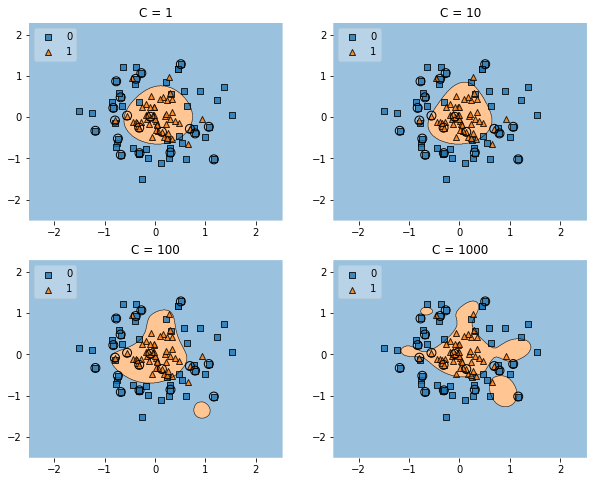

In [16]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['C = 1', 'C = 10', 'C = 100', 'C = 1000']
for clf, lab, grd in zip([rbf_clf1, rbf_clf2, rbf_clf3, rbf_clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, X_highlight=X_test, legend=2)
    plt.title(lab)

plt.show();

In [17]:
import matplotlib.gridspec as gridspec
import itertools

rbf_clf1 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma = 0.1))
))

rbf_clf2 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma = 1))
))

rbf_clf3 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma = 10))
))

rbf_clf4 = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma = 100))
))

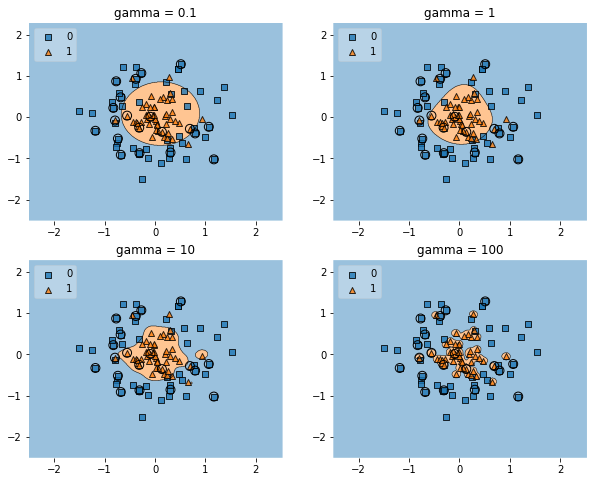

In [18]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['gamma = 0.1', 'gamma = 1', 'gamma = 10', 'gamma = 100']
for clf, lab, grd in zip([rbf_clf1, rbf_clf2, rbf_clf3, rbf_clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, X_highlight=X_test, legend=2)
    plt.title(lab)

plt.show();

In [19]:
accuracy_score(rbf_clf1.predict(X_test), y_test)
accuracy_score(rbf_clf2.predict(X_test), y_test)
accuracy_score(rbf_clf3.predict(X_test), y_test)
accuracy_score(rbf_clf4.predict(X_test), y_test)

0.95

0.9

0.9

1.0

Gaussian kernel fits the make circles data really well. Overfitting actually works well in this case, the gaussian kernel "learns" the problem really well and makes accurate predictions on test data. 

Similarity here with KNN.

## Iris data

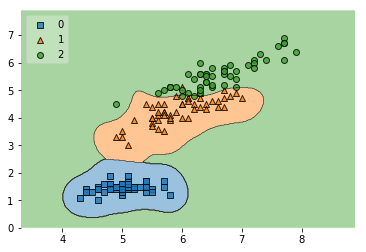

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(gamma = 10))
))
svm_clf = poly_kernel_svm_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=svm_clf, legend=2);

# make spirals

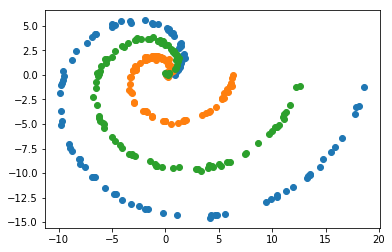

In [21]:
# make a spiral
import math
points = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points[i] = [3*theta*math.cos(theta) + 0.1*np.random.randn(1), 3*theta*math.sin(theta) + 0.1*np.random.randn(1)]

points_1 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points_1[i] = [theta*math.cos(theta) + 0.1*np.random.randn(1), theta*math.sin(theta) + 0.1*np.random.randn(1)]

points_2 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points_2[i] = [2*theta*math.cos(theta) + 0.1*np.random.randn(1), 2*theta*math.sin(theta) + 0.1*np.random.randn(1)]

X = np.vstack((points, points_1, points_2))
y = np.repeat([0, 1, 2], 100)


plt.scatter(points[:,0], points[:,1])
plt.scatter(points_1[:,0], points_1[:,1])
plt.scatter(points_2[:,0], points_2[:,1])
plt.show()

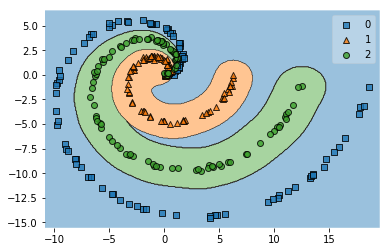

In [22]:
from sklearn.svm import SVC
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(gamma = 10))
))
svm_clf = svm_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=svm_clf, legend=1);

# make some wild shapes

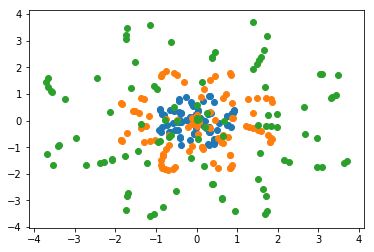

In [23]:
%matplotlib inline
import math
points = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points[i] = [math.sin(4*theta)*math.cos(theta), math.sin(4*theta)*math.sin(theta)]

points_1 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points_1[i] = [2*math.sin(4*theta)*math.cos(theta), 2*math.sin(4*theta)*math.sin(theta)]

points_2 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points_2[i] = [4*math.sin(4*theta)*math.cos(theta), 4*math.sin(4*theta)*math.sin(theta)]
    
X = np.vstack((points, points_1, points_2))
y = np.repeat([0, 1, 2], 100)


plt.scatter(points[:,0], points[:,1])
plt.scatter(points_1[:,0], points_1[:,1])
plt.scatter(points_2[:,0], points_2[:,1])
plt.show()

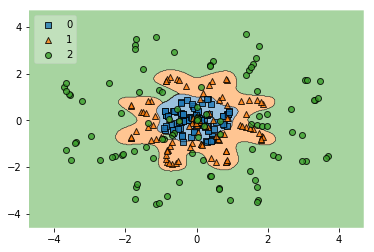

In [24]:
from sklearn.svm import SVC
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(gamma = 10))
))
svm_clf = svm_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=svm_clf, legend=2);

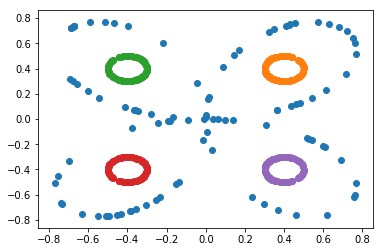

In [25]:
import math
points = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points[i] = [math.sin(2*theta)*math.cos(theta), math.sin(2*theta)*math.sin(theta)]
    
points1 = np.zeros((100, 2))
points2 = np.zeros((100, 2))
points3 = np.zeros((100, 2))
points4 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    x = .1*math.cos(theta) + 0.4
    y = .1*math.sin(theta) + 0.4
    points1[i] = [x, y]
    points2[i] = [-1*x, y]
    points3[i] = [-1*x, -1*y]
    points4[i] = [x, -1*y]

    
X = np.vstack((points, points1, points2, points3, points4))
y = np.repeat([0, 1, 2, 3, 4], 100)    
    
plt.scatter(points[:,0], points[:,1])
plt.scatter(points1[:,0], points1[:,1])
plt.scatter(points2[:,0], points2[:,1])
plt.scatter(points3[:,0], points3[:,1])
plt.scatter(points4[:,0], points4[:,1])
plt.show();

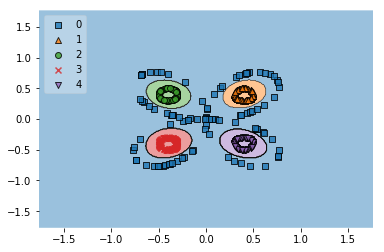

In [26]:
from sklearn.svm import SVC
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(gamma = 1))
))
svm_clf = svm_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=svm_clf, legend=2);

# make three circles

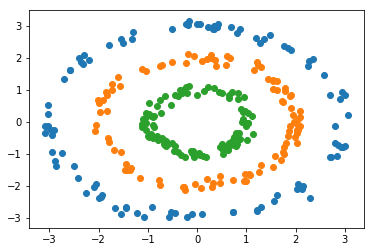

In [27]:
# make three circles
import math
points = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points[i] = [3*math.cos(theta) + 0.1*np.random.randn(1), 3*math.sin(theta) + 0.1*np.random.randn(1)]
    
points1 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points1[i] = [2*math.cos(theta) + 0.1*np.random.randn(1), 2*math.sin(theta) + 0.1*np.random.randn(1)]
    
points2 = np.zeros((100, 2))
for i in range(100):
    theta = np.random.uniform(0, 2*math.pi)
    points2[i] = [math.cos(theta) + 0.1*np.random.randn(1), math.sin(theta) + 0.1*np.random.randn(1)]


X = np.vstack((points, points1, points2))
y = np.repeat([0, 1, 2], 100)

    
plt.scatter(points[:,0], points[:,1])
plt.scatter(points1[:,0], points1[:,1])
plt.scatter(points2[:,0], points2[:,1])

plt.show();

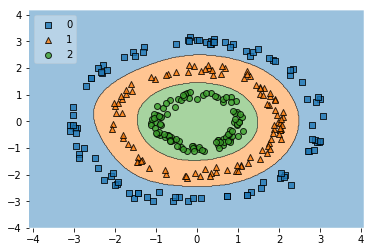

In [28]:
from sklearn.svm import SVC
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(gamma = 1))
))
svm_clf = svm_clf.fit(X, y)

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=svm_clf, legend=2);

# make blobs

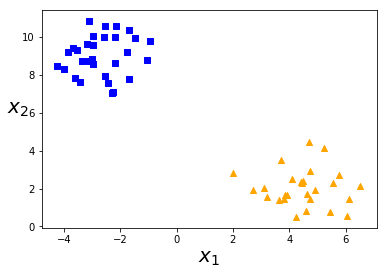

In [49]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

plt.scatter(X_train[(y_train==0),0],X_train[(y_train==0),1], c = 'blue', marker = 's')
plt.scatter(X_train[(y_train==1),0],X_train[(y_train==1),1], c = 'orange', marker = '^')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.show();